In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [ ]:
data = pd.read_csv("Mall_Customers.csv")
data.head()

In [ ]:
data.rename(columns = {"Gender":"gender","Age":"age","Annual Income (k$)":"annual","Spending Score (1-100)":"score"},inplace = True)
data.head()

In [ ]:
data.isnull().values.any()

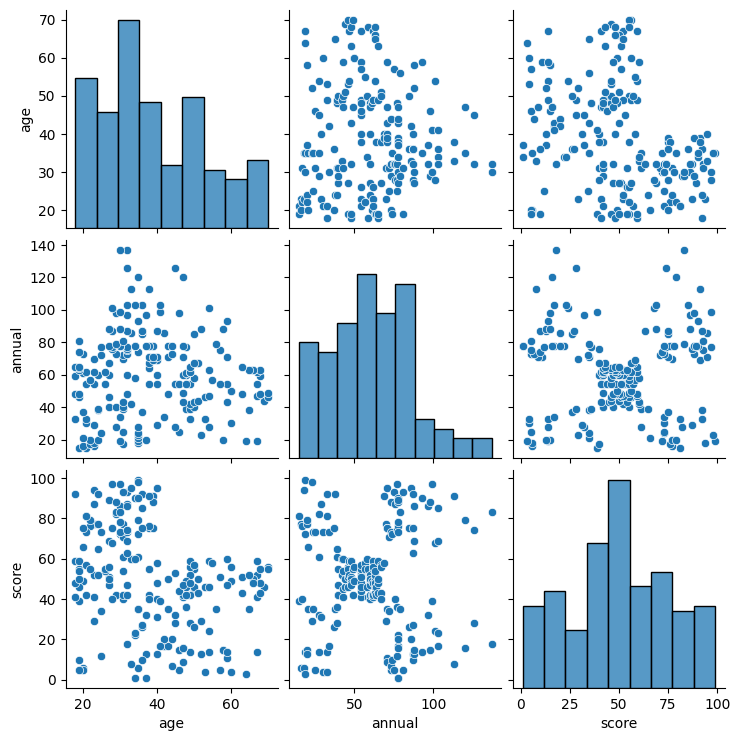

In [9]:
sns.pairplot(data[["age","annual","score"]])

In [ ]:
import sklearn.cluster as  cluster
model = cluster.KMeans(n_clusters = 5)
model.fit(data[['annual','score']])
model.cluster_centers_

In [ ]:
data['incomeclurster'] = model.labels_
data

<Axes: xlabel='annual', ylabel='score'>

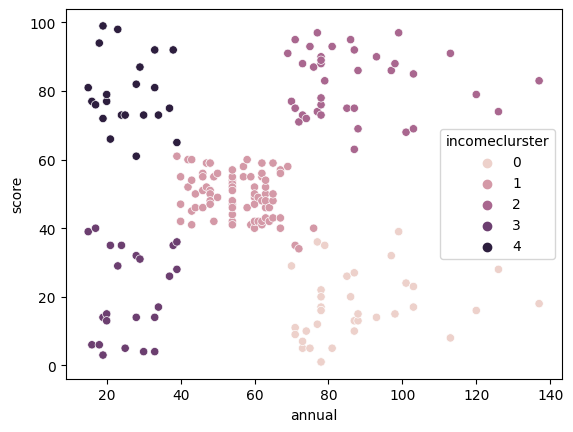

In [16]:
sns.scatterplot(x="annual",y="score",hue="incomeclurster",data = data)

In [ ]:
model = cluster.KMeans(n_clusters=2)
model.fit(data[['age',"score"]])
model.cluster_centers_

In [ ]:
data['agecluster'] = model.labels_
data

<Axes: xlabel='age', ylabel='score'>

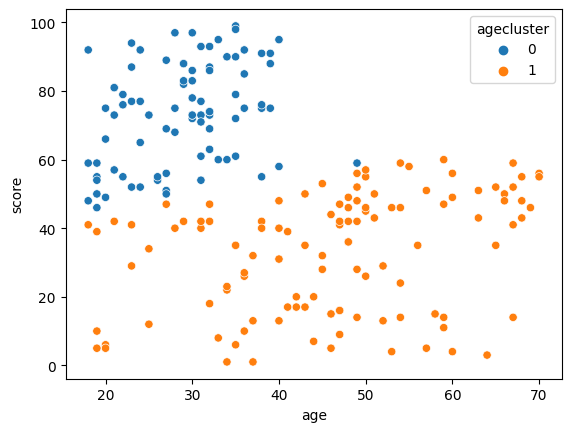

In [21]:
sns.scatterplot(x = 'age',y = 'score',hue = "agecluster", data = data)

In [22]:
krange = [1,12]
wcss = []

In [ ]:
for k in krange:
  km = cluster.KMeans(n_clusters = k)
  km.fit(data[['annual','score']])
  wcss.append(km.inertia_)

In [28]:
wcss

[269981.28, 16031.899688737973]

In [ ]:
plt.xlabel('Number of cluster')
plt.ylabel('Number of Sum')
plt.plot(krange,wcss)